In [1]:
import os 
import sys
import pickle
from pathlib import Path
path_problemset = os.path.abspath("./")
path_lobster = os.path.abspath('../lobster/')
os.chdir(path_lobster)
path_data = path_lobster+'/data'
sys.path.append(path_lobster+'/src')

In [2]:
from produce_data import produce
import numpy as np
import pandas as pd

Specify symbol, date, initial, time and final time:

In [3]:
symbol='MSFT'
date='2012-06-21'
initial_time=float(10*60*60)
final_time=float(15*60*60)

Load or produce data from source:

In [4]:
produce_data=False
load_data=True
if produce_data:
    data=produce(
        symbol,date,initial_time,final_time
    )
else:
    if load_data:
        time_window = str('{}-{}'.format(int(initial_time), int(final_time)))
        with open(path_problemset+'/{}_{}_{}_data'.format(symbol, date, time_window), 'rb') as source:
            data=pickle.load(source)

# Exercise 2.2.1

In [5]:
mf = data.messagefile
idx = mf['event_type'].isin([4])
trades = mf[idx].copy()
trades = trades.iloc[1:,:].reset_index(drop=True)
lob_trades = data.LOB[idx].copy()
lob_trades = lob_trades.iloc[:-1,:].reset_index(drop=True)
path_trades=path_problemset+'/trades.csv'
Path(path_trades).touch()
trades.to_csv(path_trades, index=False)
path_lob_trades=path_problemset+'/lob_trades.csv'
Path(path_lob_trades).touch()
lob_trades.to_csv(path_lob_trades, index=False)

Let's take a look at the two pandas dataframe just created.

In [6]:
trades

,direction,event_type,level,original_idx,price,size,time,delta_t,same_time_stamp
0,1,4,0,62222,308800,5345,36000.419575,0.000958,False
1,1,4,1,62304,308700,2000,36000.446011,0.000261,False
2,1,4,0,62312,308700,807,36000.446849,0.000135,False
3,1,4,1,62353,308600,700,36000.465200,0.000140,False
4,1,4,0,62362,308600,1744,36000.465487,0.000287,False
...,...,...,...,...,...,...,...,...,...
4608,1,4,1,512946,303100,1700,53994.834583,0.000019,False
4609,1,4,1,512981,303100,200,53994.862056,0.006314,False
4610,1,4,1,512985,303100,418,53994.862073,0.000017,False
4611,1,4,1,512988,303100,100,53994.862491,0.000057,False


In [7]:
lob_trades

,ask_price_1,ask_volume_1,bid_price_1,bid_volume_1,ask_price_2,ask_volume_2,bid_price_2,bid_volume_2,ask_price_3,ask_volume_3,...,ask_price_9,ask_volume_9,bid_price_9,bid_volume_9,ask_price_10,ask_volume_10,bid_price_10,bid_volume_10,original_idx,time
0,308900,1855,308800,5345,309000,5380,308700,3125,309100,5560,...,309700,4670,308000,4602,309800,1600,307900,100,62201,36000.418617
1,308900,1855,308700,3125,309000,5380,308600,2650,309100,5560,...,309700,4670,307900,100,309800,1600,307800,6616,62222,36000.419575
2,308800,10850,308700,807,308900,15120,308600,2650,309000,7380,...,309600,3013,307900,1500,309700,4670,307800,6416,62304,36000.446011
3,308800,10850,308600,2650,308900,15066,308500,13750,309000,7380,...,309600,3013,307800,6416,309700,4670,307700,460,62312,36000.446849
4,308800,14850,308600,1744,308900,13866,308500,10158,309000,7993,...,309600,3013,307800,6416,309700,4470,307700,460,62353,36000.465200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,303200,10806,303100,8800,303300,15646,303000,20778,303400,26963,...,304000,12100,302300,16600,304100,11900,302200,8000,512935,53994.834411
4609,303200,10806,303100,6100,303300,15646,303000,20778,303400,26963,...,304000,12100,302300,16600,304100,11900,302200,8000,512946,53994.834583
4610,303200,13036,303100,600,303300,15846,303000,20172,303400,27427,...,304000,11900,302300,16600,304100,11900,302200,8200,512981,53994.862056
4611,303200,13036,303100,182,303300,15846,303000,20172,303400,27427,...,304000,11900,302300,16600,304100,11900,302200,8200,512985,53994.862073


# Exercise 2.2.2

The main task is behind the scenes: we created a class GlostenMilgrom that implements the model's formulae. Take a look at the python script glosten_milgrom.py. In the next cells we will import this class and instantiate it to be used in the exercises. 

In [8]:
from glosten_milgrom import GlostenMilgrom

In [9]:
gm = GlostenMilgrom()

GlostenMilgrom Constructor


We demonstrate a few functionalities of the class GlostenMilgrom. In particular, at every call of the method GlostenMilgrom.update, we generate a new trade with probability law dependent on $\pi$ and, based on this trade, we update the market makers' quotes.

In [10]:
gm.set_param(pi=0.35, nu_H = 105.0, nu_L =95.0)

In [11]:
gm.print_param()
for n in range(10): #if pi is not too small, you should observe the convergence towards the true price 
    gm.update(draw_random_sign=True, true_price='nu_H')
    gm.print_last()

pi=0.3500;    nu_H = 105.00; nu_L = 95.00; 
theta_t = 0.5000; a_t =101.75; b_t =98.25
theta_t = 0.6750; a_t =101.75; b_t =98.25
theta_t = 0.8118; a_t =103.12; b_t =100.38
theta_t = 0.8996; a_t =104.00; b_t =102.24
theta_t = 0.8118; a_t =104.49; b_t =103.50
theta_t = 0.8996; a_t =104.00; b_t =102.24
theta_t = 0.9490; a_t =104.49; b_t =103.50
theta_t = 0.8996; a_t =104.75; b_t =104.23
theta_t = 0.9490; a_t =104.49; b_t =103.50
theta_t = 0.9748; a_t =104.75; b_t =104.23


The actual exercise 2.2.2 is solved simply by passing the empirical data from Lobster to our implemented class GlostenMilgrom.

In [12]:
d = np.array((-1)*trades['direction'].values, dtype=np.int) #Notice the change of sign
a = np.array(lob_trades['ask_price_1'].values, dtype=np.int)
b = np.array(lob_trades['bid_price_1'].values, dtype=np.int)
gm.store_directions(d)
gm.store_empirical_quotes(a,b)

## Exercises 2.2.3

In [13]:
from scipy.optimize import minimize as scipy_minimize

In [14]:
def obj(x, gm):
    pi, nu_H, nu_L = x[0], x[1], x[2]
    gm.set_param(pi=pi, nu_H=nu_H, nu_L=nu_L)
    gm.produce_all_quotes()
    gm.store_quoted_prices()
    len_ = min(len(gm.ask_price), len(gm.empirical_ask))
    return np.linalg.norm(gm.ask_price[:len_] - gm.empirical_ask[:len_]) \
               + np.linalg.norm(gm.bid_price[:len_] - gm.empirical_bid[:len_])

In [15]:
bounds=tuple([(0.0,1.0), (np.amin(b),1.5*np.amax(a)), (0.5*np.amin(b), np.amax(a)) ])
x0 = (gm.empirical_pi, np.amax(a), np.amin(b))
maxiter=50
res=scipy_minimize(obj,x0, args=(gm,),
                   method='TNC',
                   jac=False, # The diligent student will compute the jacobian instead
                   bounds=bounds,
                   options={'maxiter': maxiter})

## Exercise 2.2.4

In [16]:
x_hat = res['x']
pi, nu_H, nu_L = x_hat[0], x_hat[1], x_hat[2]
gm.set_param(pi=pi, nu_H = nu_H, nu_L = nu_L)
gm.produce_all_quotes()
gm.store_quoted_prices()

In [17]:
import matplotlib.pyplot as plt

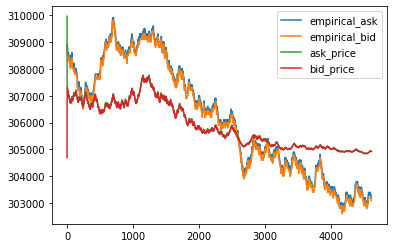

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
for price in ['empirical_ask', 'empirical_bid', 'ask_price', 'bid_price']:
    ax.plot(gm.__dict__[price], label = price)
ax.legend()
plt.show()